<a href="https://colab.research.google.com/github/elstin80/Power-BI-projects/blob/main/GAMMA%2CHYDRON%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
pip install imblearn

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Dataset:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by: P. Savicky Institute of Computer Science, AS of CR Czech Republic savicky '@' cs.cas.c

In [152]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [153]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [154]:
df['class']=(df['class']=='g').astype(int)

In [155]:
df

fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  class  
0       -8.2027  40.0920   81.8828      1  
1       -9.9574   6.3609  205.2610      1  
2      -45.2160  76.9600  256.7880      1  
3       -7.1513  10.4490  116.7370      1  
4       21.8393   4.6480  356.4620      1  
...         ...      ...       ...    ...  
19015    2.8766   2.4229  106.8258      0  
19016   -2.9632  86.7975  247.4560      0  
19017   -9.4662  30.2987  256.5166      0  
19018  -63.8389  84.6874  408.3166      0  
19019   31.4755  52.7310  272.3174      0  

[19020 rows x 11 columns]

In [156]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

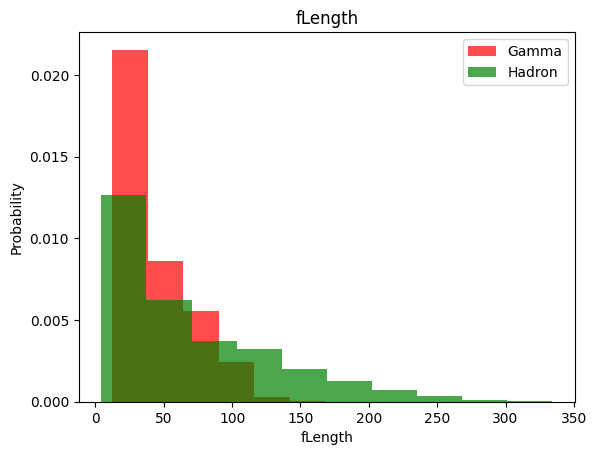

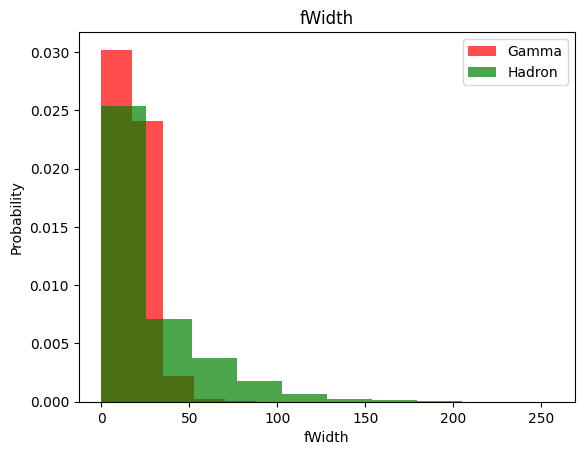

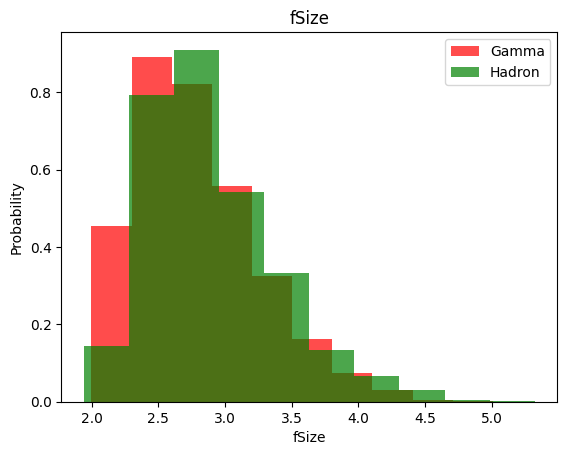

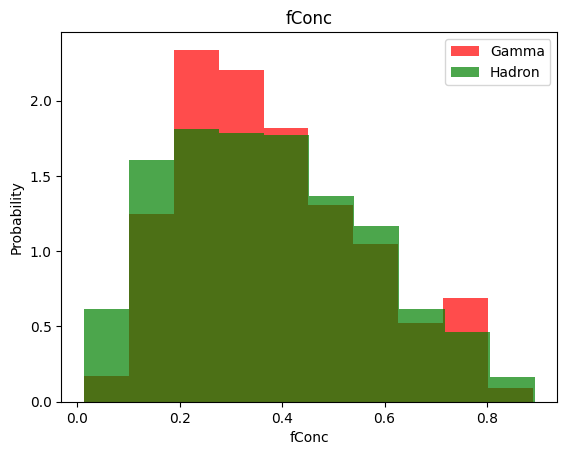

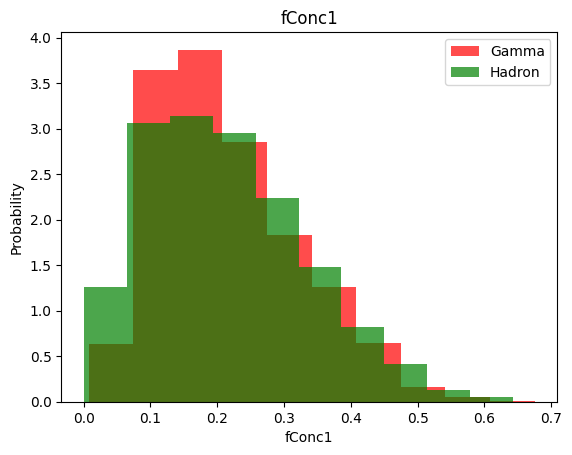

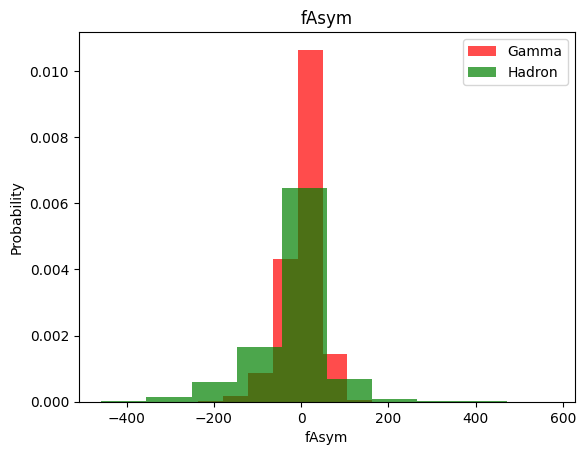

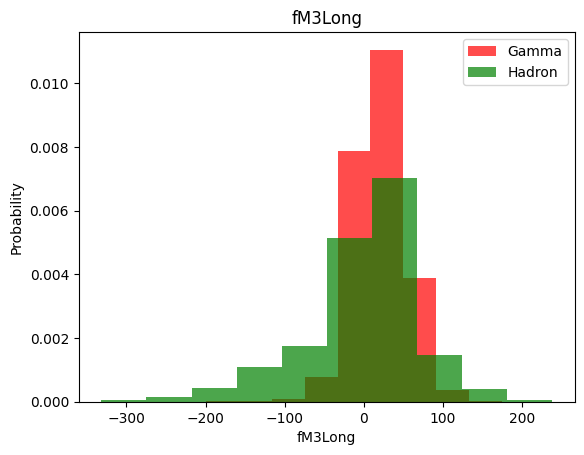

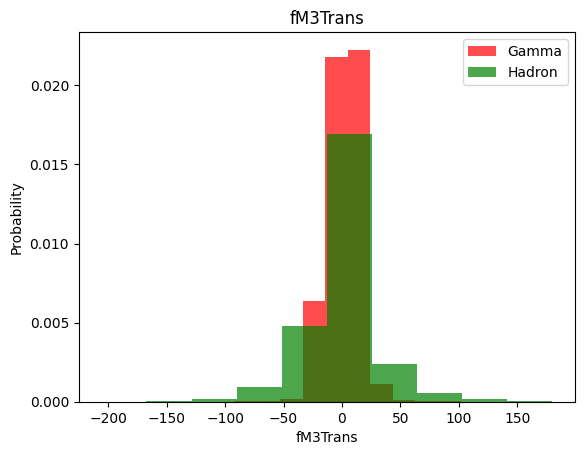

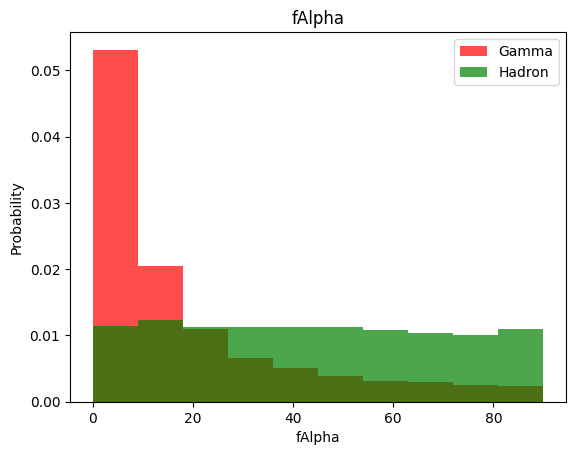

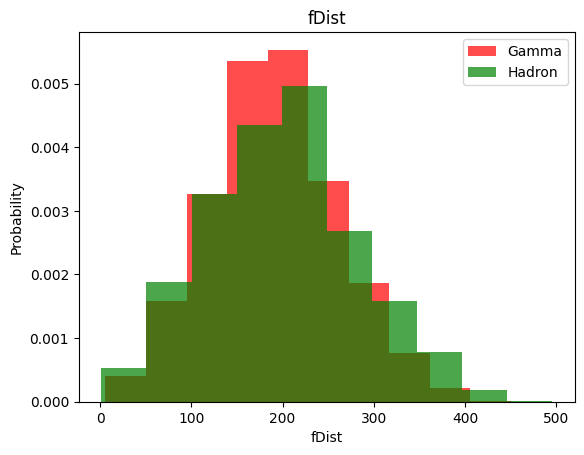

In [157]:
for label in cols[:-1]:
    plt.hist(df[df['class']==1][label],color='red',label='Gamma',alpha=0.7,density=True)
    plt.hist(df[df['class']==0][label],color='green',label='Hadron',alpha=0.7,density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# TRAIN,VALIDATION,TEST

In [166]:
train,valid,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])     #splitting my dataset
                                                                                         #60-80% for validation
                                                                                         #80-100% for Testing

In [159]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values


  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [160]:
print(len(train[train['class']==1]))  #gamma
print(len(train[train['class']==0]))

7385
4027


# Hadron is Lower,we gotta resample to match Gamma
## Using Imbelearn.oversampling ,we sample into more or less equal propotions

In [161]:
train,X_train,y_train=scale_dataset(train,oversample=True)

In [162]:
len(y_train)

14770

In [163]:
sum(y_train == 1)

7385

In [164]:
sum(y_train == 0)  #REBALNCED NOW

7385

In [167]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# K- Nearest Neighbour (KNN)

In [168]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [169]:
knn_model=KNeighborsClassifier(n_neighbors=1)

In [171]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [172]:
y_pred = knn_model.predict(X_test)

In [173]:
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [178]:
y_test

array([0, 0, 1, ..., 1, 1, 1])

## Import Classification Report

In [179]:
print(classification_report(y_test,y_pred))   #we should look on f1-score coz we have unbalanced data set for 1 neibor

              precision    recall  f1-score   support

           0       0.80      0.68      0.73      1372
           1       0.83      0.90      0.87      2432

    accuracy                           0.82      3804
   macro avg       0.82      0.79      0.80      3804
weighted avg       0.82      0.82      0.82      3804



## change no of neighbors to 3 now

In [180]:
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [181]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.68      0.73      1372
           1       0.83      0.90      0.87      2432

    accuracy                           0.82      3804
   macro avg       0.82      0.79      0.80      3804
weighted avg       0.82      0.82      0.82      3804



## NOW FOR 5 neighbors

In [182]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)


KNeighborsClassifier()

In [183]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.68      0.73      1372
           1       0.83      0.90      0.87      2432

    accuracy                           0.82      3804
   macro avg       0.82      0.79      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# NAIVE BAYES ALGORITHM

In [184]:
from sklearn.naive_bayes import GaussianNB

In [185]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train,y_train)

In [186]:
y_pred=nb_model.predict(X_test)

In [187]:
print(classification_report(y_test,y_pred))     #72% is  not shabby..but still not great

              precision    recall  f1-score   support

           0       0.68      0.40      0.51      1372
           1       0.73      0.90      0.80      2432

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



# LOGISTIC REGRESSION

In [188]:
from sklearn.linear_model import LogisticRegression

In [189]:
lg_model = LogisticRegression()
lg_model = nb_model.fit(X_train,y_train)

In [190]:
y_pred=lg_model.predict(X_test)

In [191]:
print(classification_report(y_test,y_pred))         #72 % is not bad..But aint good either

              precision    recall  f1-score   support

           0       0.68      0.40      0.51      1372
           1       0.73      0.90      0.80      2432

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



# SUPPORT VECTOR MACHINES (SVM)

In [192]:
from sklearn.svm import SVC

In [193]:
svm_model=SVC()
svm_model=svm_model.fit(X_train,y_train)

In [195]:
y_pred=svm_model.predict(X_test)
print(classification_report(y_test,y_pred))      #86% Accuracy,NOT BAD

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1372
           1       0.89      0.90      0.89      2432

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# NEURAL NETWORKS

In [196]:
import tensorflow as tf

In [211]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [201]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy',
                  metrics=['accuracy'])


In [202]:
history = nn_model.fit(
    X_train,y_train,epochs=100,batch_size=32,validation_split=0.2,verbose=0
)

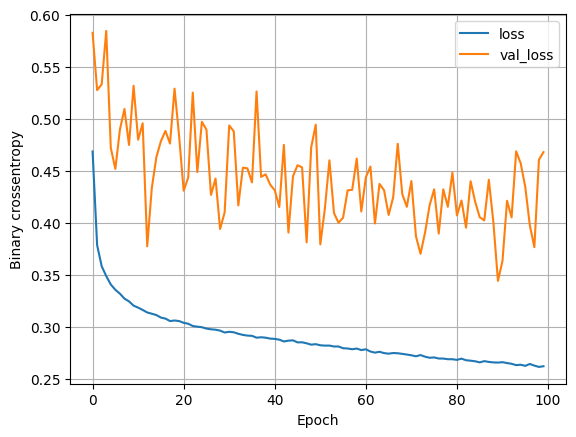

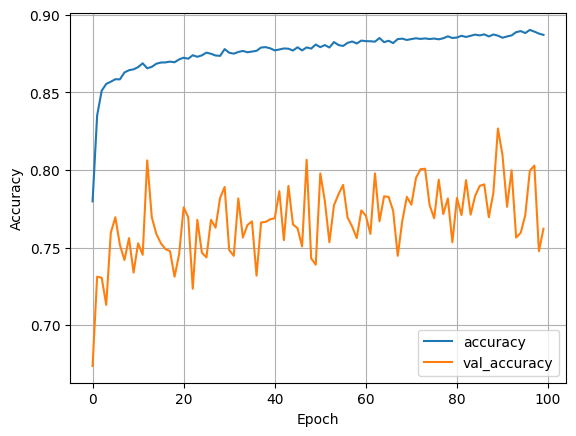

In [212]:
plot_loss(history)
plot_accuracy(history)

In [217]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

In [220]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

16 nodes, dropout 0, lr 0.01, batch size 32


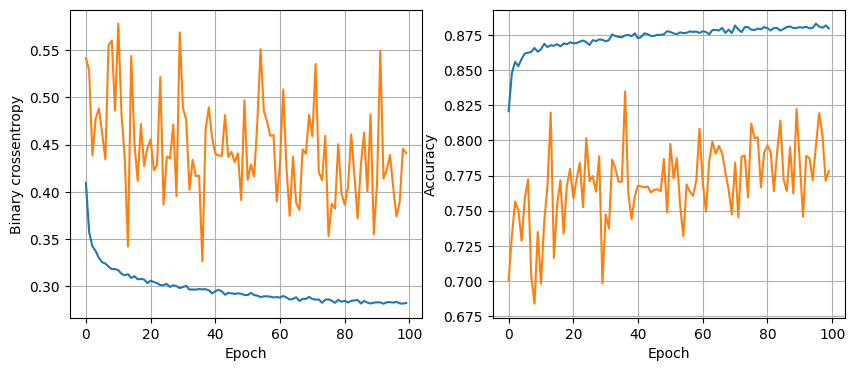

119/119 [==============================] - 0s 1ms/step - loss: 0.3214 - accuracy: 0.8672
16 nodes, dropout 0, lr 0.01, batch size 64


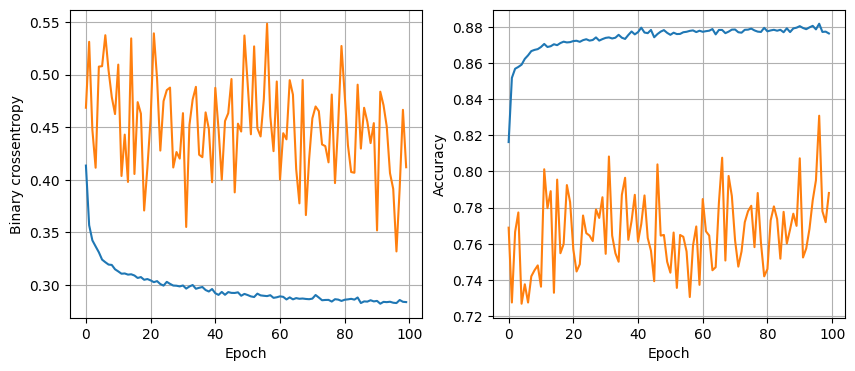

119/119 [==============================] - 0s 1ms/step - loss: 0.3293 - accuracy: 0.8641
16 nodes, dropout 0, lr 0.01, batch size 128


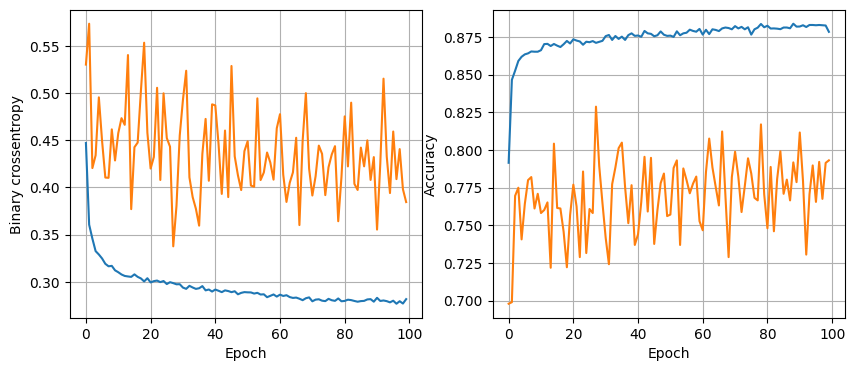

119/119 [==============================] - 0s 2ms/step - loss: 0.3267 - accuracy: 0.8641
16 nodes, dropout 0, lr 0.005, batch size 32


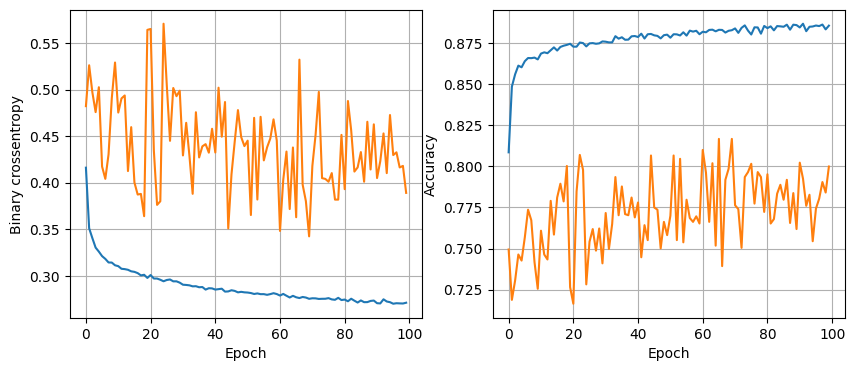

119/119 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.8696
16 nodes, dropout 0, lr 0.005, batch size 64


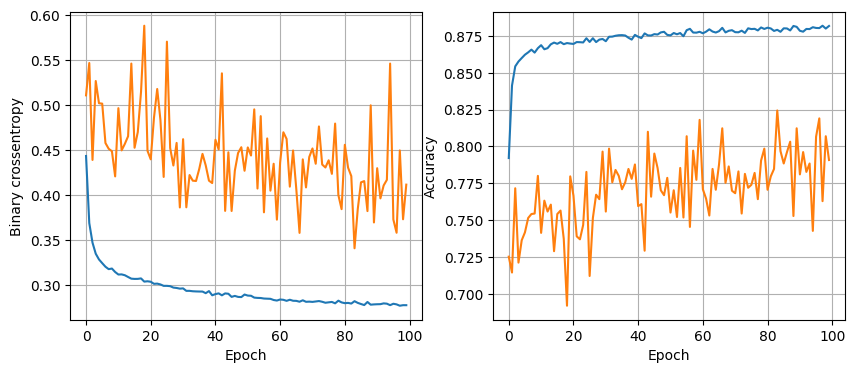

119/119 [==============================] - 0s 2ms/step - loss: 0.3217 - accuracy: 0.8683
16 nodes, dropout 0, lr 0.005, batch size 128


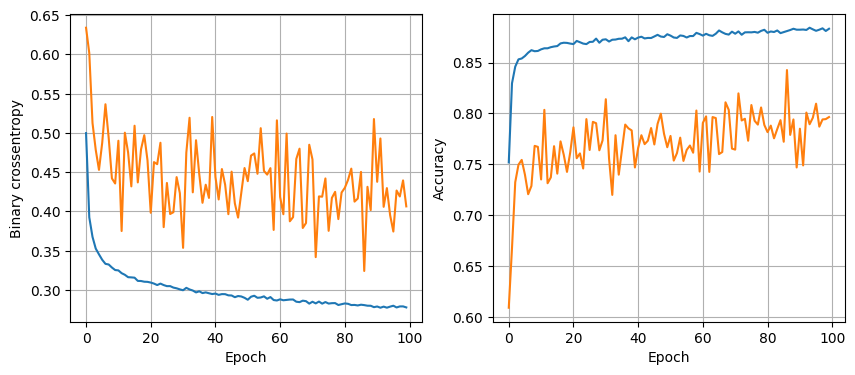

119/119 [==============================] - 0s 2ms/step - loss: 0.3199 - accuracy: 0.8693
16 nodes, dropout 0, lr 0.001, batch size 32


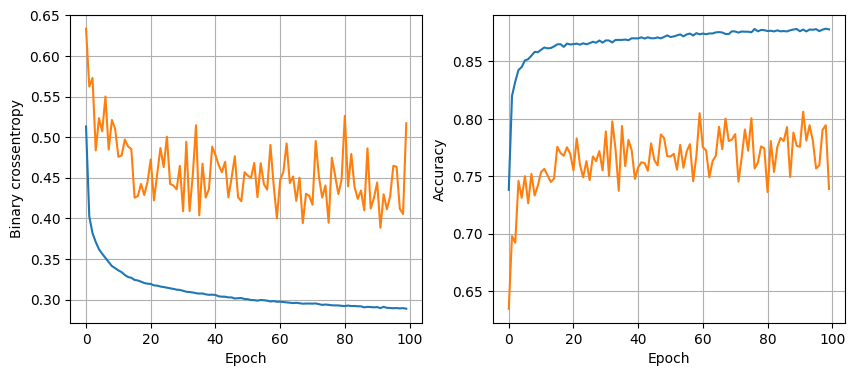

119/119 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.8701
16 nodes, dropout 0, lr 0.001, batch size 64


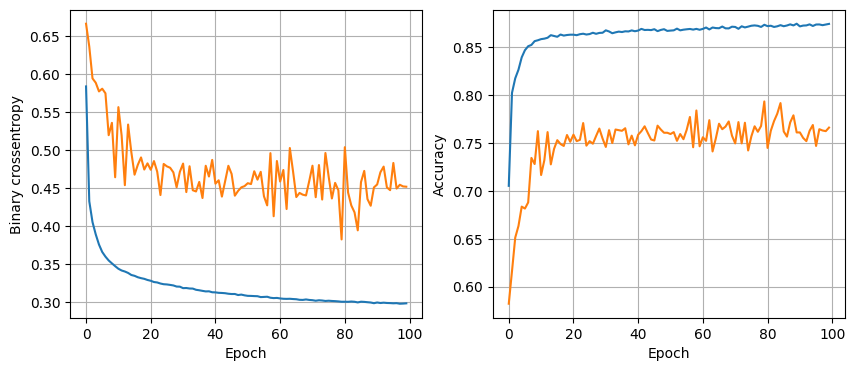

119/119 [==============================] - 0s 3ms/step - loss: 0.3152 - accuracy: 0.8720
16 nodes, dropout 0, lr 0.001, batch size 128


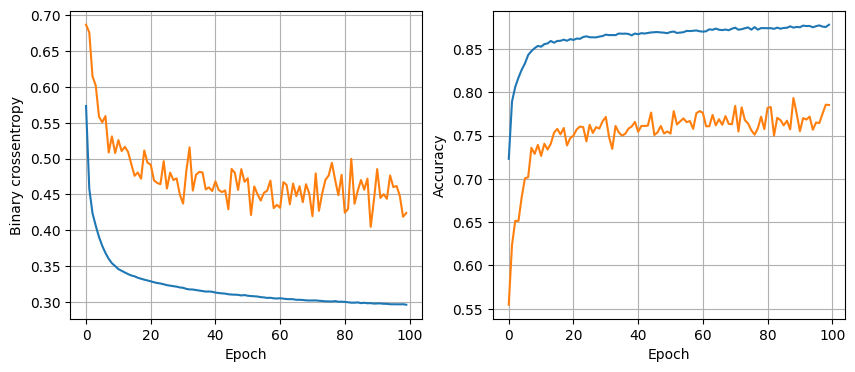

119/119 [==============================] - 0s 2ms/step - loss: 0.3107 - accuracy: 0.8717
16 nodes, dropout 0.2, lr 0.01, batch size 32


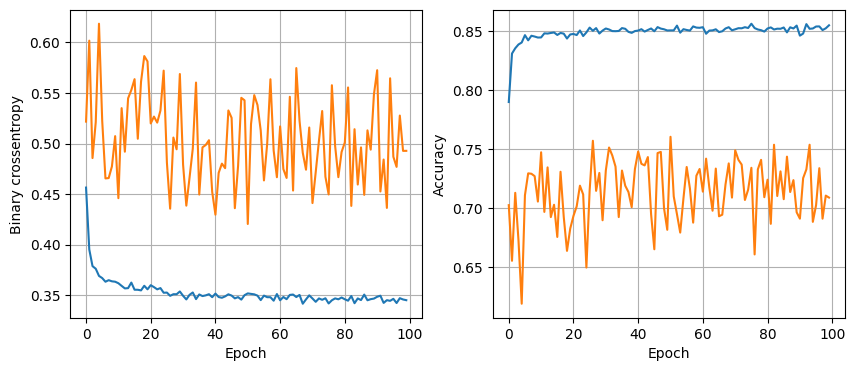

119/119 [==============================] - 0s 2ms/step - loss: 0.3262 - accuracy: 0.8599
16 nodes, dropout 0.2, lr 0.01, batch size 64


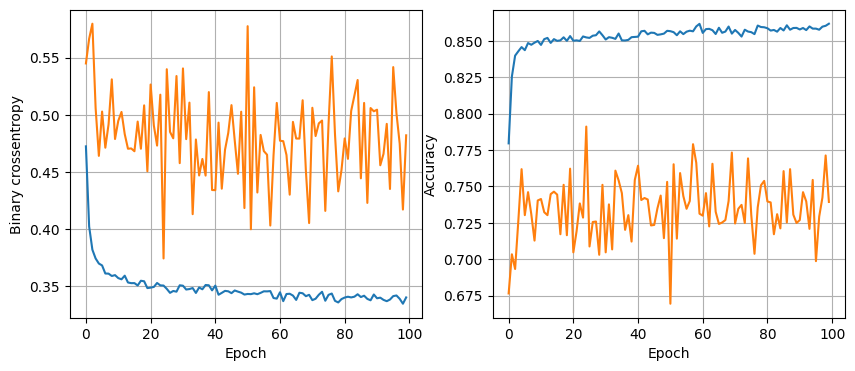

119/119 [==============================] - 0s 2ms/step - loss: 0.3169 - accuracy: 0.8704
16 nodes, dropout 0.2, lr 0.01, batch size 128


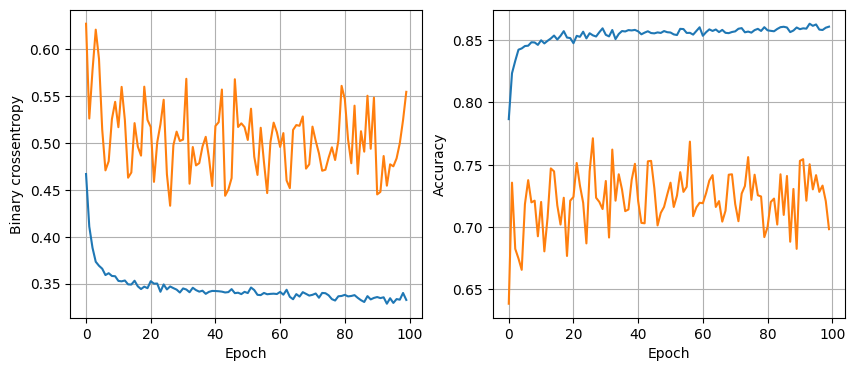

119/119 [==============================] - 0s 2ms/step - loss: 0.3197 - accuracy: 0.8667
16 nodes, dropout 0.2, lr 0.005, batch size 32


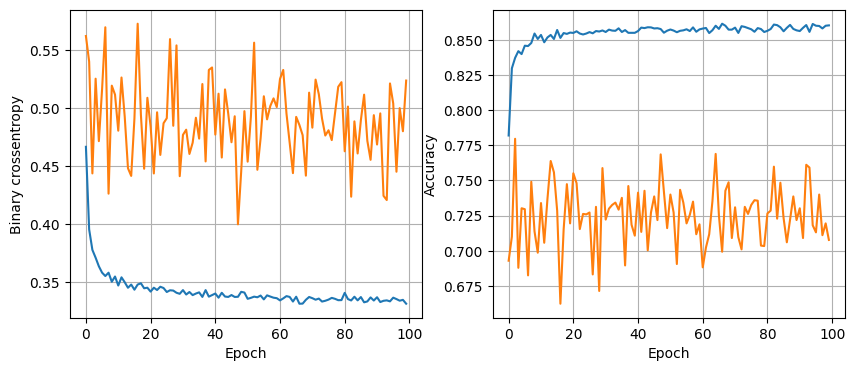

119/119 [==============================] - 0s 2ms/step - loss: 0.3236 - accuracy: 0.8683
16 nodes, dropout 0.2, lr 0.005, batch size 64


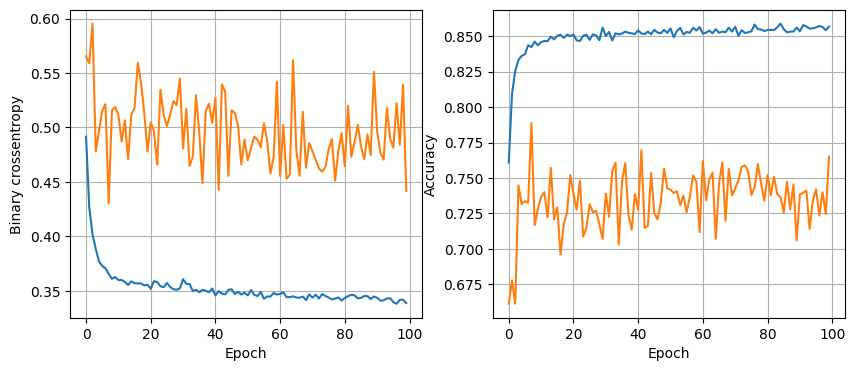

119/119 [==============================] - 0s 3ms/step - loss: 0.3273 - accuracy: 0.8601
16 nodes, dropout 0.2, lr 0.005, batch size 128


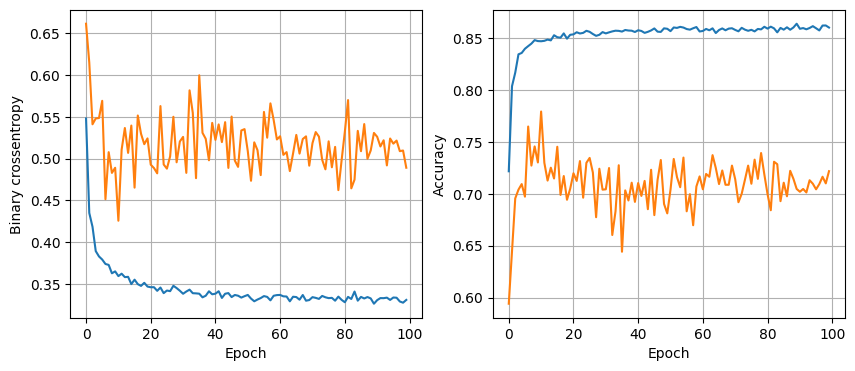

119/119 [==============================] - 0s 2ms/step - loss: 0.3203 - accuracy: 0.8683
16 nodes, dropout 0.2, lr 0.001, batch size 32


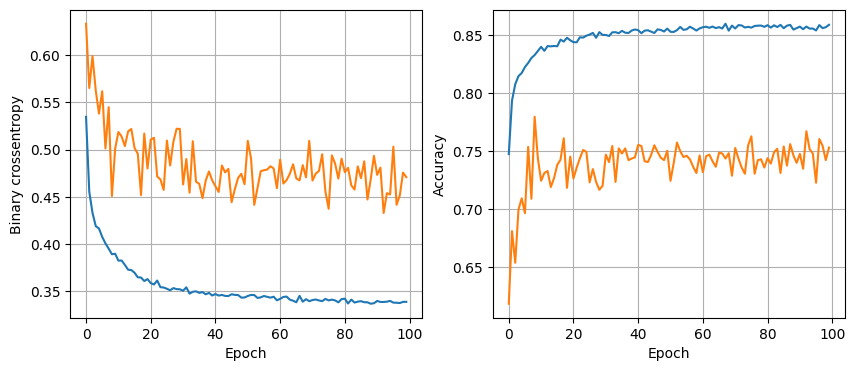

119/119 [==============================] - 0s 2ms/step - loss: 0.3224 - accuracy: 0.8654
16 nodes, dropout 0.2, lr 0.001, batch size 64


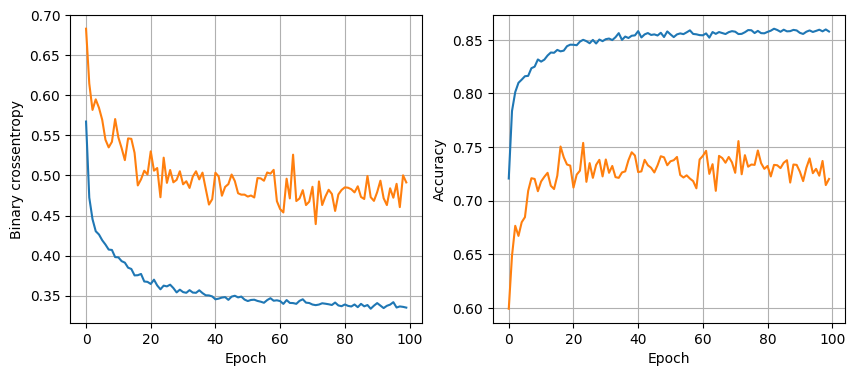

119/119 [==============================] - 0s 2ms/step - loss: 0.3175 - accuracy: 0.8678
16 nodes, dropout 0.2, lr 0.001, batch size 128


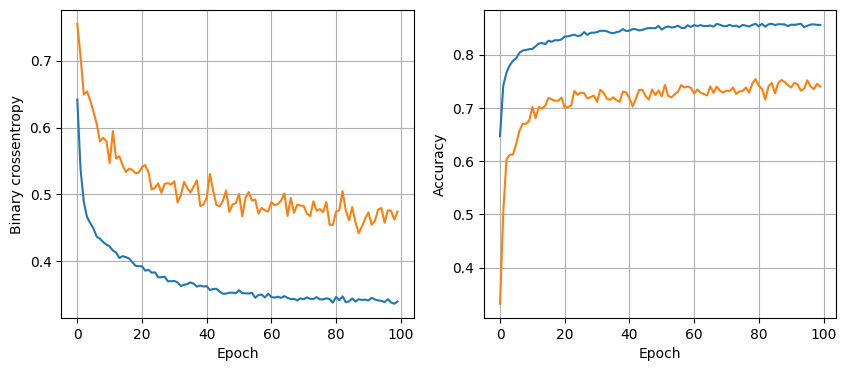

119/119 [==============================] - 0s 2ms/step - loss: 0.3173 - accuracy: 0.8688
32 nodes, dropout 0, lr 0.01, batch size 32


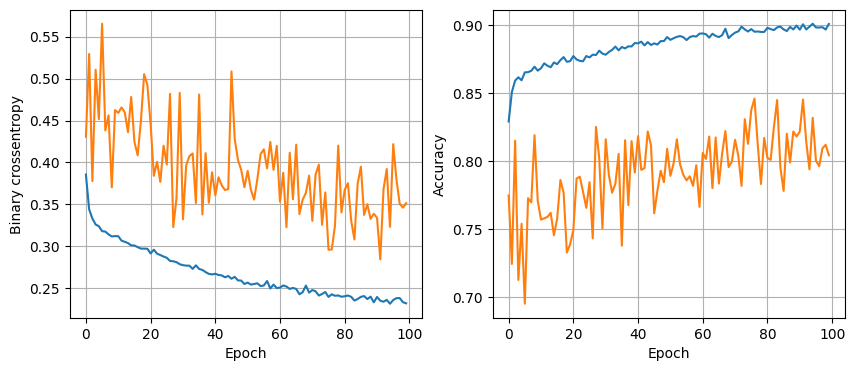

119/119 [==============================] - 0s 3ms/step - loss: 0.3844 - accuracy: 0.8620
32 nodes, dropout 0, lr 0.01, batch size 64


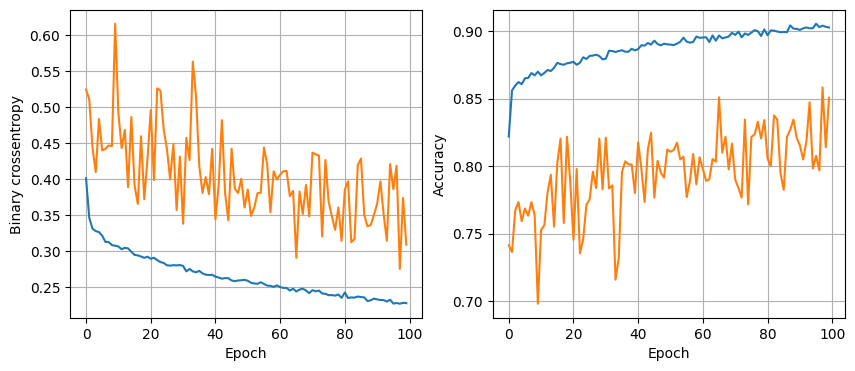

119/119 [==============================] - 0s 3ms/step - loss: 0.3839 - accuracy: 0.8538
32 nodes, dropout 0, lr 0.01, batch size 128


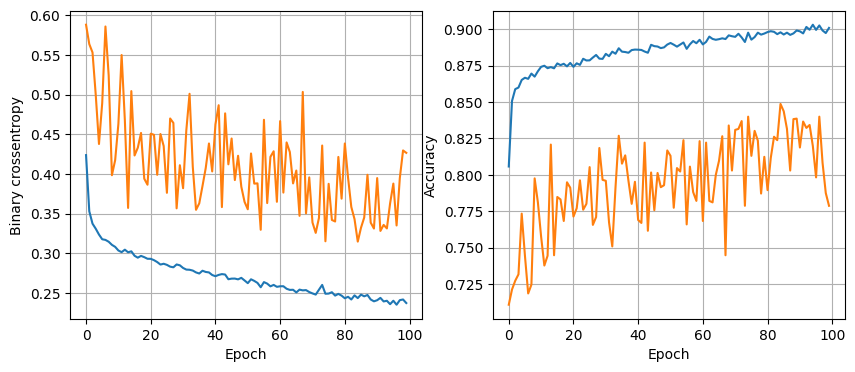

119/119 [==============================] - 0s 2ms/step - loss: 0.3662 - accuracy: 0.8646
32 nodes, dropout 0, lr 0.005, batch size 32


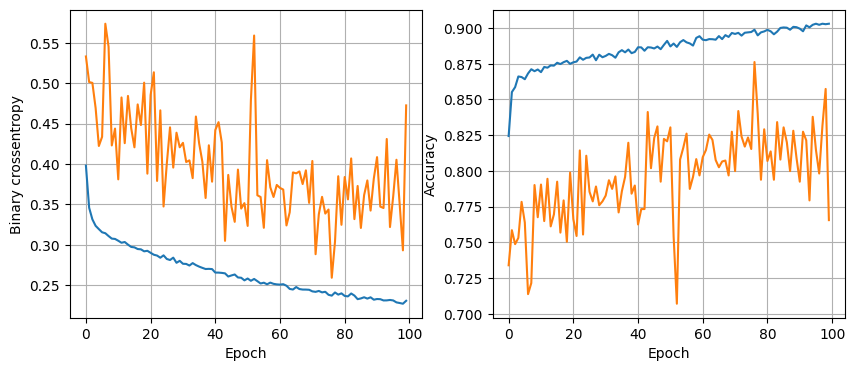

119/119 [==============================] - 0s 2ms/step - loss: 0.3848 - accuracy: 0.8591
32 nodes, dropout 0, lr 0.005, batch size 64


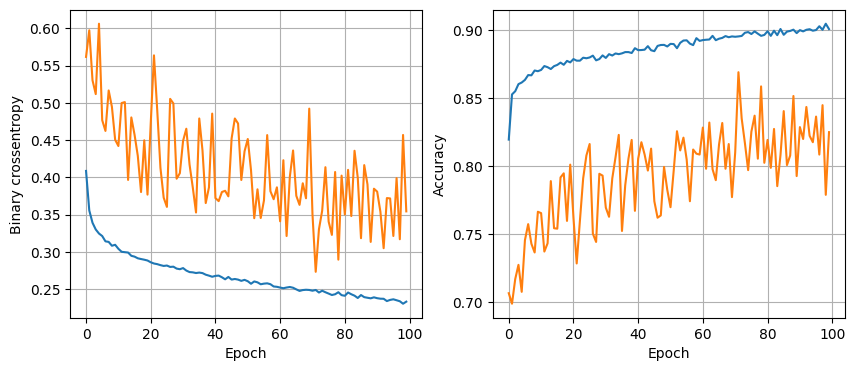

119/119 [==============================] - 0s 2ms/step - loss: 0.3718 - accuracy: 0.8604
32 nodes, dropout 0, lr 0.005, batch size 128


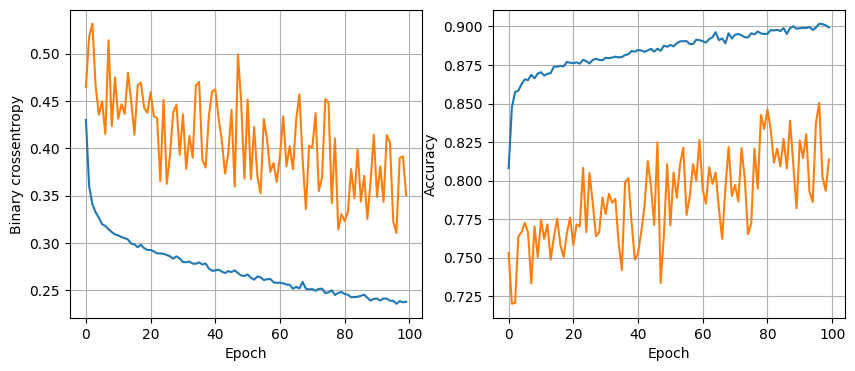

119/119 [==============================] - 0s 2ms/step - loss: 0.3440 - accuracy: 0.8696
32 nodes, dropout 0, lr 0.001, batch size 32


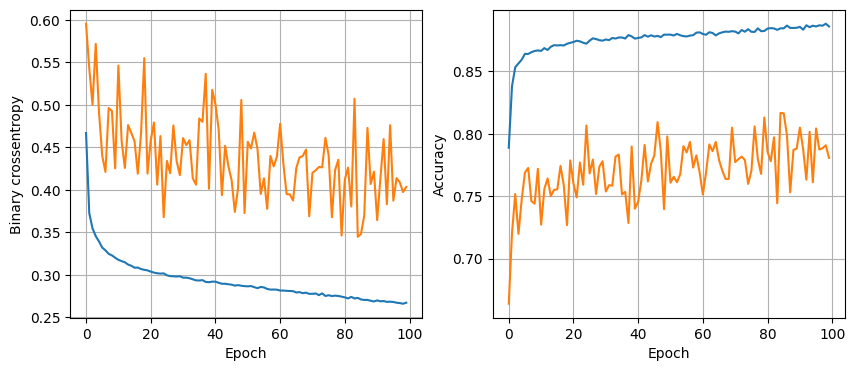

119/119 [==============================] - 0s 2ms/step - loss: 0.3170 - accuracy: 0.8701
32 nodes, dropout 0, lr 0.001, batch size 64


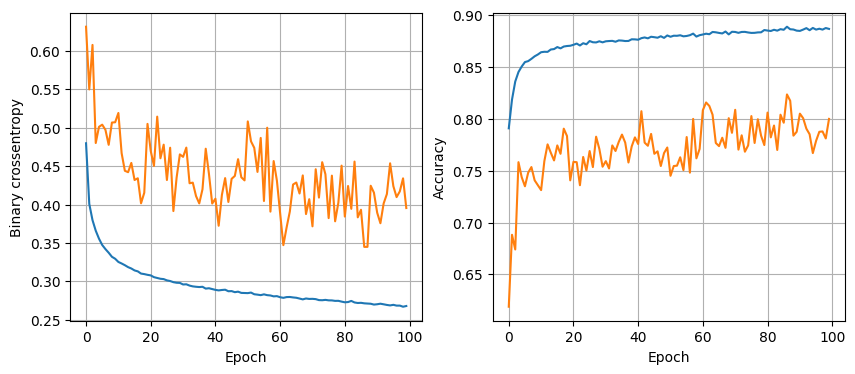

119/119 [==============================] - 0s 2ms/step - loss: 0.3135 - accuracy: 0.8699
32 nodes, dropout 0, lr 0.001, batch size 128


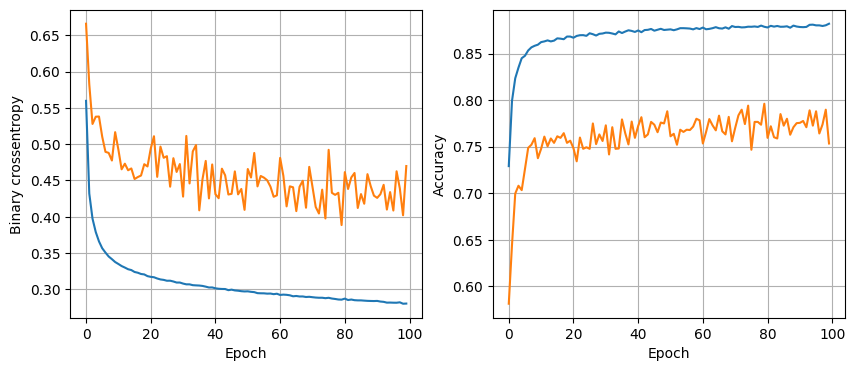

119/119 [==============================] - 0s 2ms/step - loss: 0.3083 - accuracy: 0.8778
32 nodes, dropout 0.2, lr 0.01, batch size 32


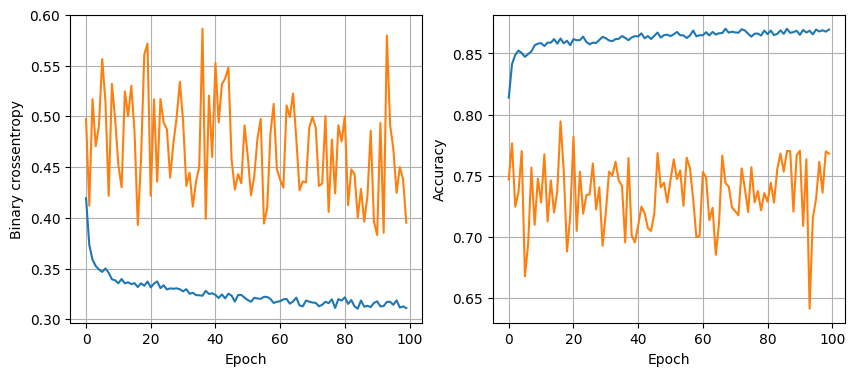

119/119 [==============================] - 0s 2ms/step - loss: 0.3177 - accuracy: 0.8728
32 nodes, dropout 0.2, lr 0.01, batch size 64


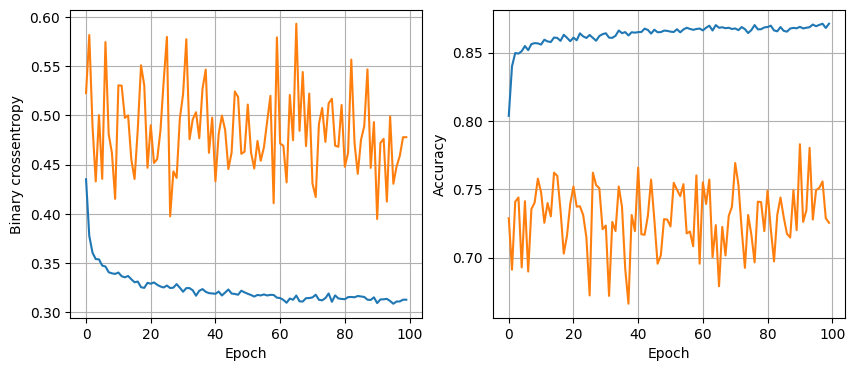

119/119 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.8670
32 nodes, dropout 0.2, lr 0.01, batch size 128


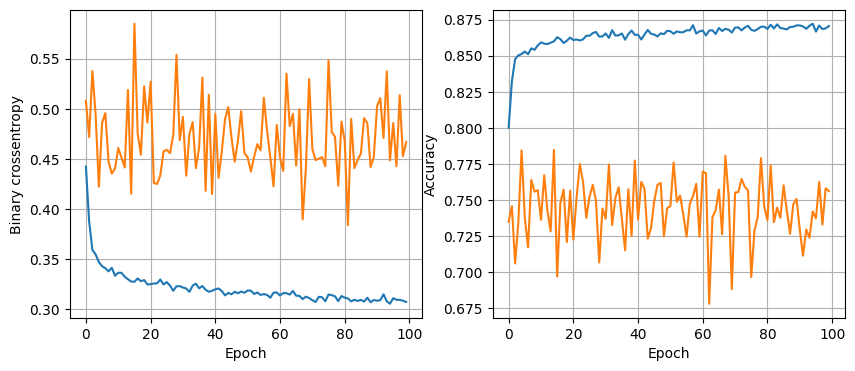

119/119 [==============================] - 0s 2ms/step - loss: 0.3067 - accuracy: 0.8738
32 nodes, dropout 0.2, lr 0.005, batch size 32


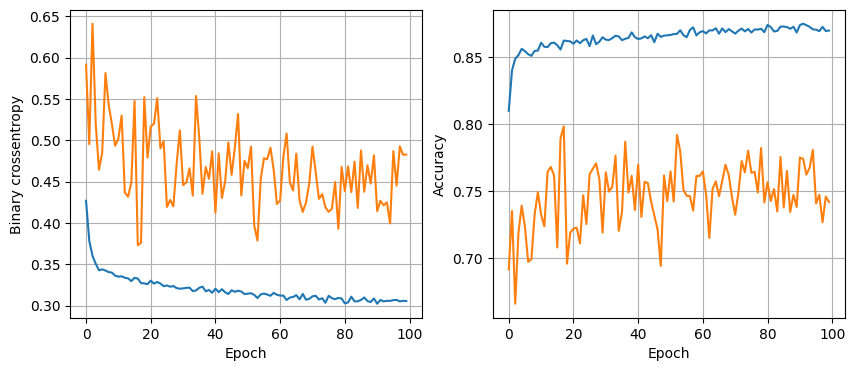

119/119 [==============================] - 0s 2ms/step - loss: 0.3070 - accuracy: 0.8770
32 nodes, dropout 0.2, lr 0.005, batch size 64


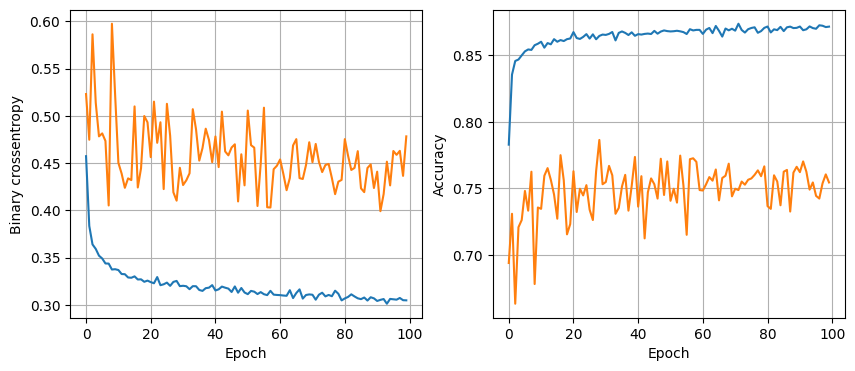

119/119 [==============================] - 0s 2ms/step - loss: 0.3117 - accuracy: 0.8746
32 nodes, dropout 0.2, lr 0.005, batch size 128


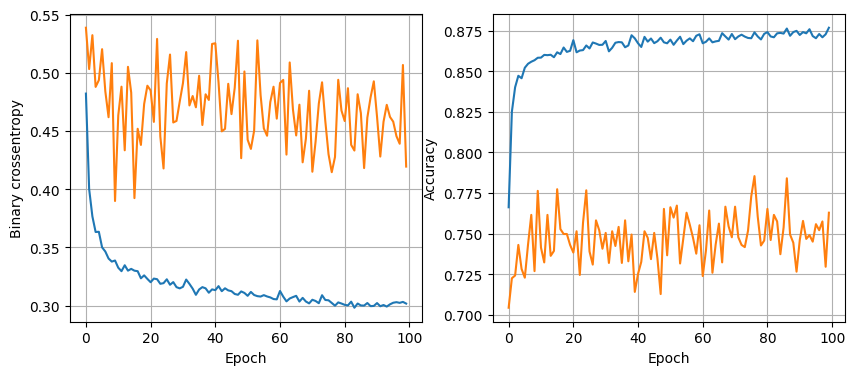

119/119 [==============================] - 0s 2ms/step - loss: 0.3006 - accuracy: 0.8767
32 nodes, dropout 0.2, lr 0.001, batch size 32


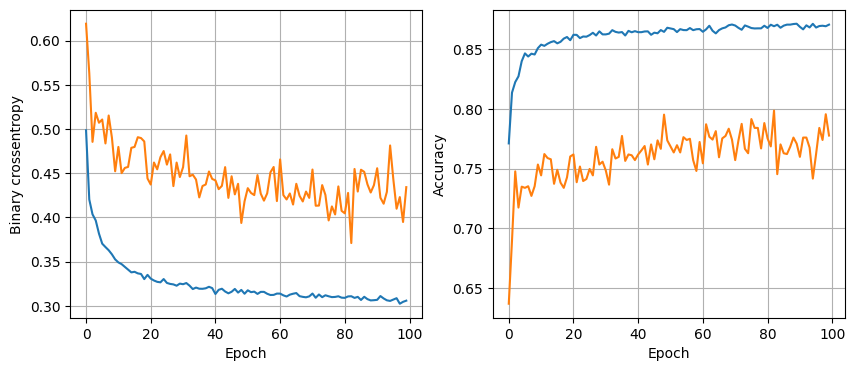

119/119 [==============================] - 0s 3ms/step - loss: 0.3084 - accuracy: 0.8720
32 nodes, dropout 0.2, lr 0.001, batch size 64


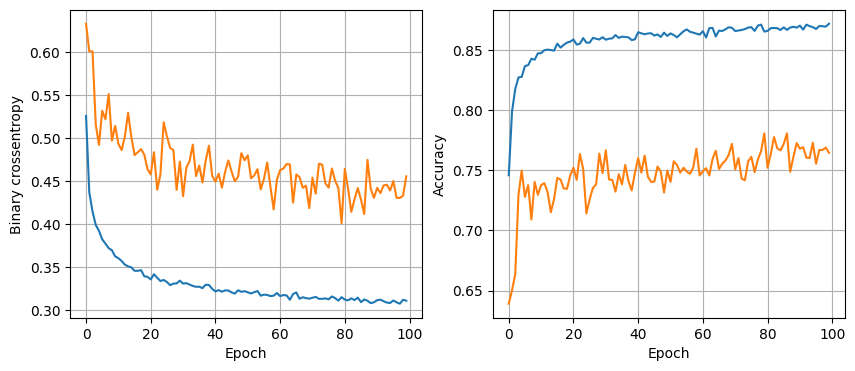

119/119 [==============================] - 0s 2ms/step - loss: 0.3101 - accuracy: 0.8715
32 nodes, dropout 0.2, lr 0.001, batch size 128


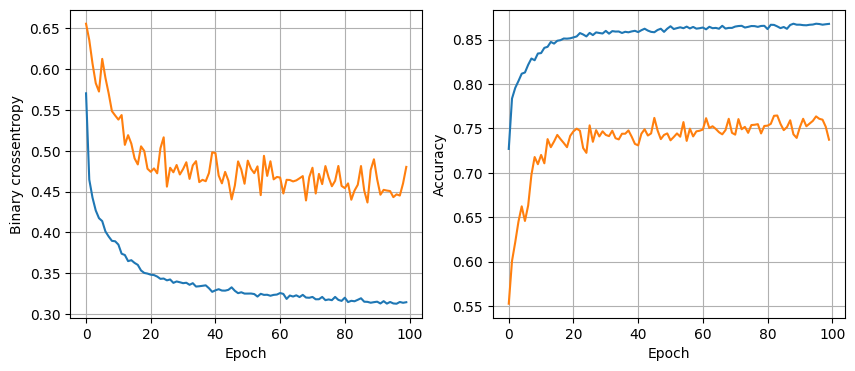

119/119 [==============================] - 0s 2ms/step - loss: 0.3060 - accuracy: 0.8738
64 nodes, dropout 0, lr 0.01, batch size 32


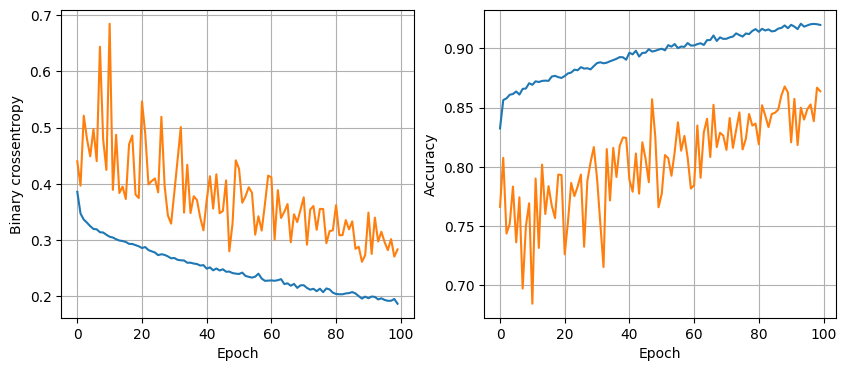

119/119 [==============================] - 0s 2ms/step - loss: 0.5576 - accuracy: 0.8557
64 nodes, dropout 0, lr 0.01, batch size 64


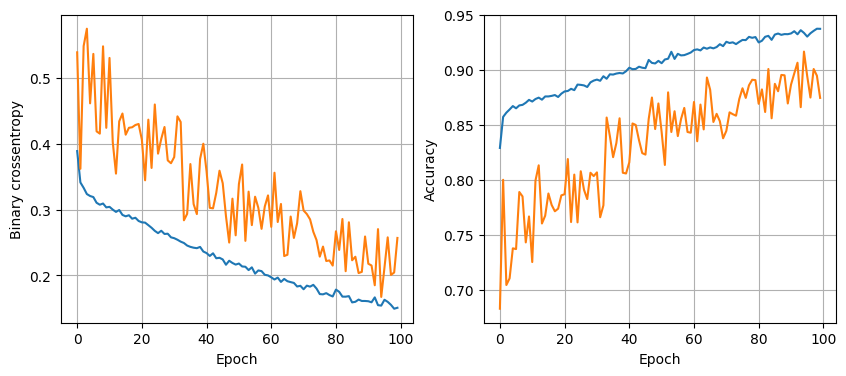

119/119 [==============================] - 0s 2ms/step - loss: 0.5889 - accuracy: 0.8620
64 nodes, dropout 0, lr 0.01, batch size 128


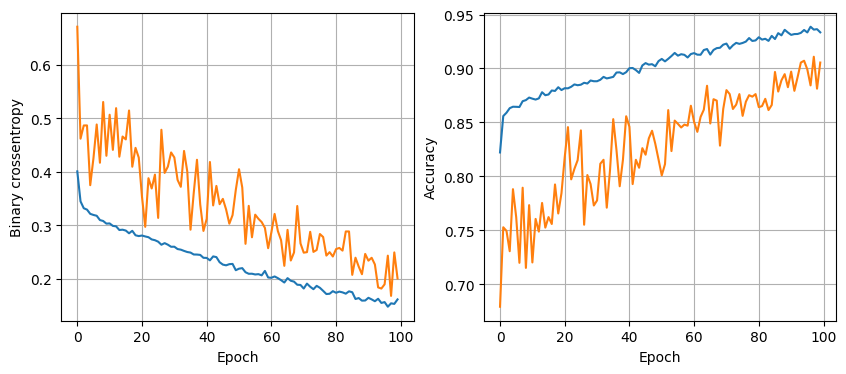

119/119 [==============================] - 0s 2ms/step - loss: 0.5726 - accuracy: 0.8491
64 nodes, dropout 0, lr 0.005, batch size 32


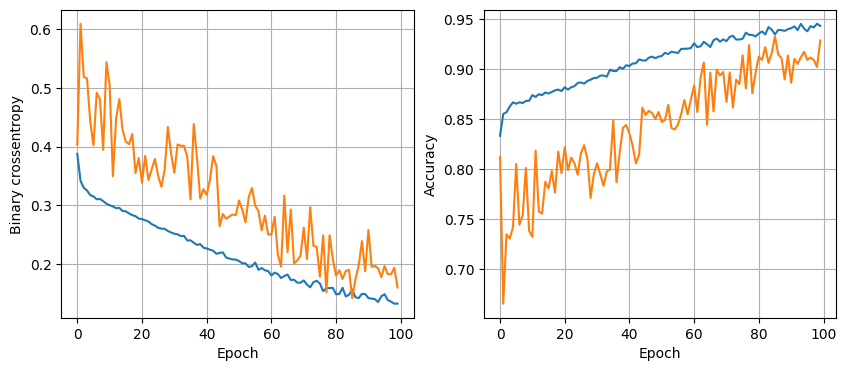

119/119 [==============================] - 0s 2ms/step - loss: 0.6210 - accuracy: 0.8457
64 nodes, dropout 0, lr 0.005, batch size 64


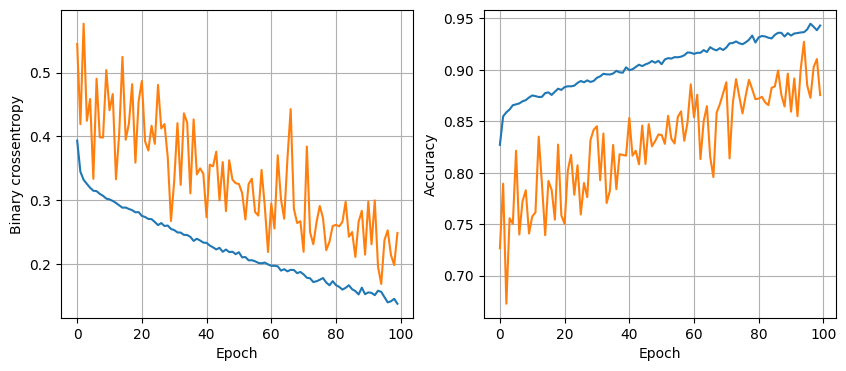

119/119 [==============================] - 0s 2ms/step - loss: 0.5672 - accuracy: 0.8538
64 nodes, dropout 0, lr 0.005, batch size 128


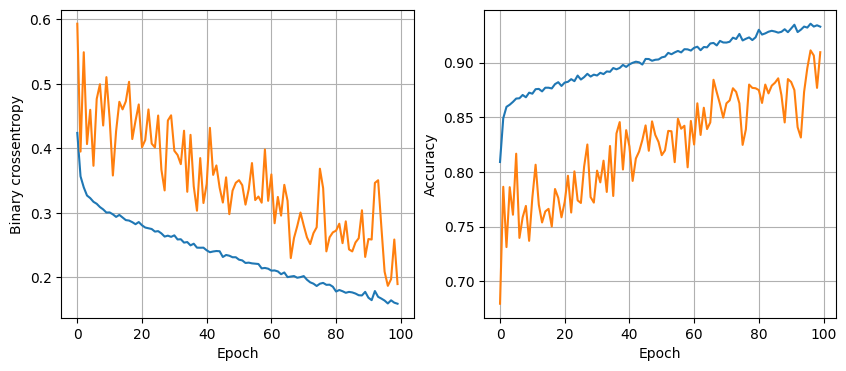

119/119 [==============================] - 0s 2ms/step - loss: 0.5051 - accuracy: 0.8473
64 nodes, dropout 0, lr 0.001, batch size 32


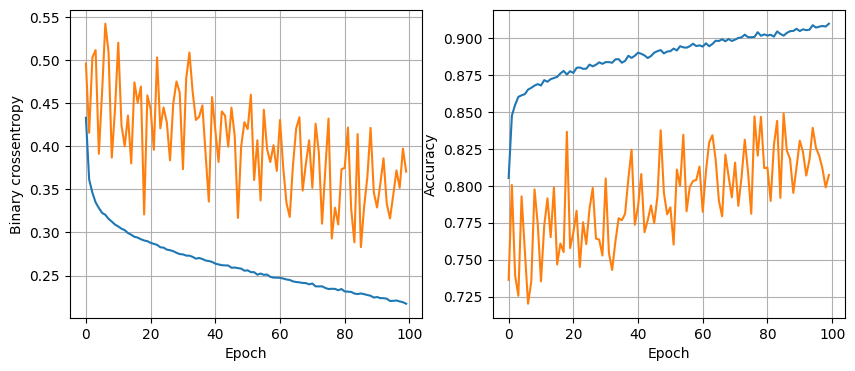

119/119 [==============================] - 0s 2ms/step - loss: 0.3451 - accuracy: 0.8707
64 nodes, dropout 0, lr 0.001, batch size 64


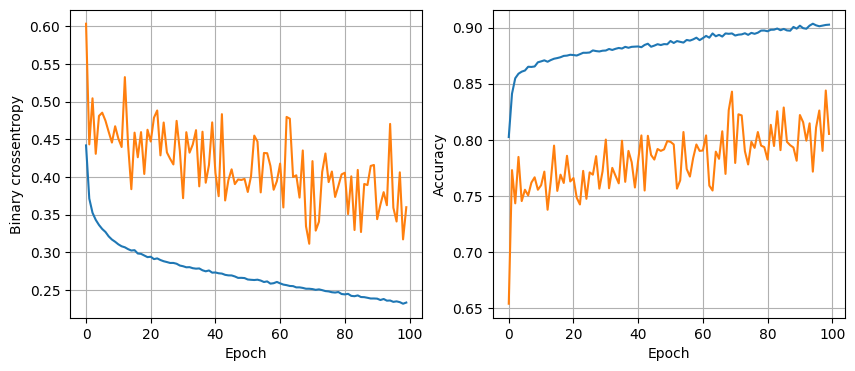

119/119 [==============================] - 0s 2ms/step - loss: 0.3327 - accuracy: 0.8707
64 nodes, dropout 0, lr 0.001, batch size 128


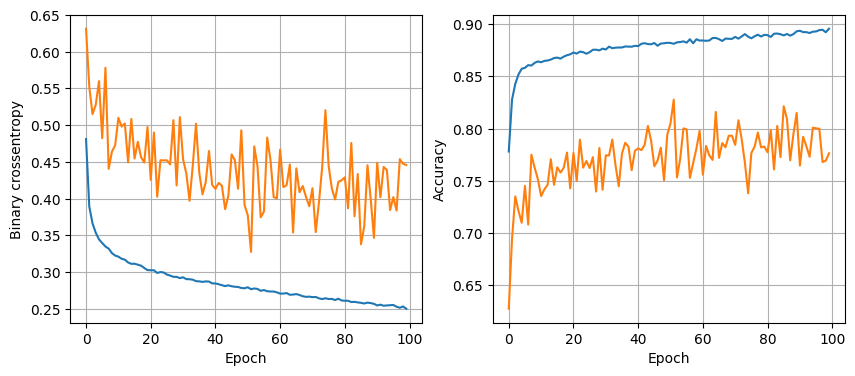

119/119 [==============================] - 0s 2ms/step - loss: 0.3166 - accuracy: 0.8736
64 nodes, dropout 0.2, lr 0.01, batch size 32


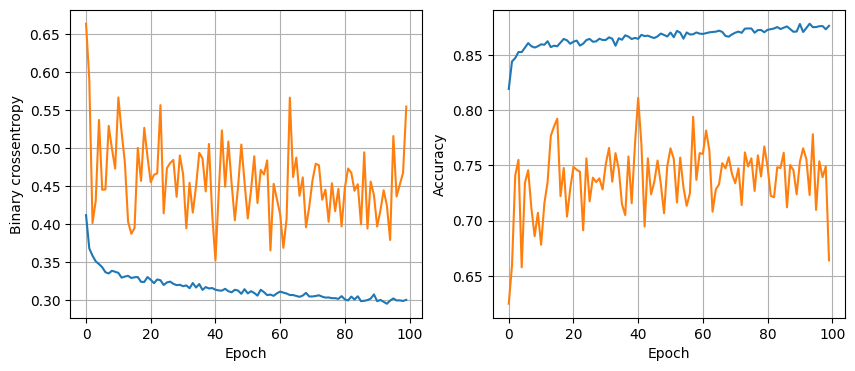

119/119 [==============================] - 0s 2ms/step - loss: 0.3290 - accuracy: 0.8570
64 nodes, dropout 0.2, lr 0.01, batch size 64


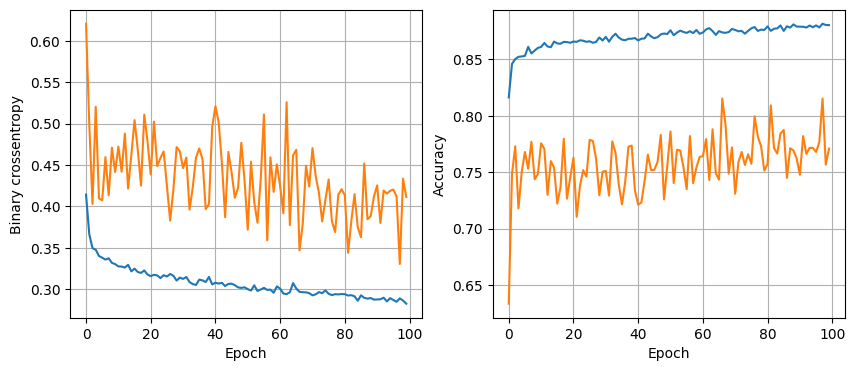

119/119 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.8757
64 nodes, dropout 0.2, lr 0.01, batch size 128


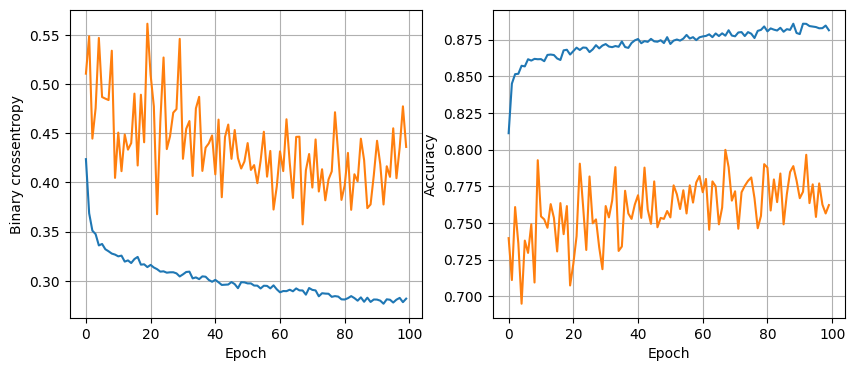

119/119 [==============================] - 0s 2ms/step - loss: 0.3136 - accuracy: 0.8722
64 nodes, dropout 0.2, lr 0.005, batch size 32


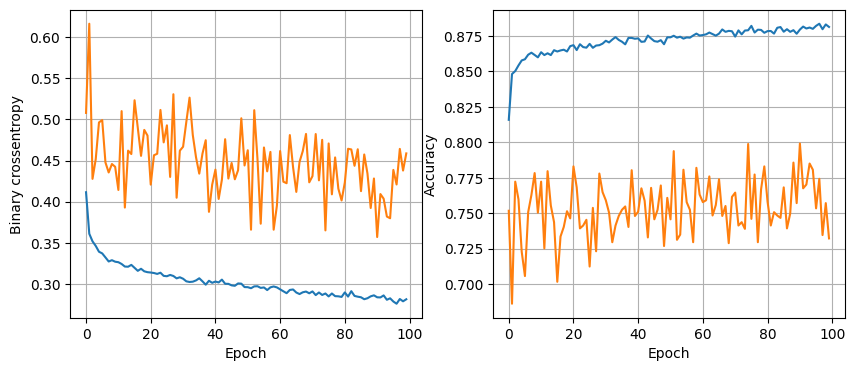

119/119 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8675
64 nodes, dropout 0.2, lr 0.005, batch size 64


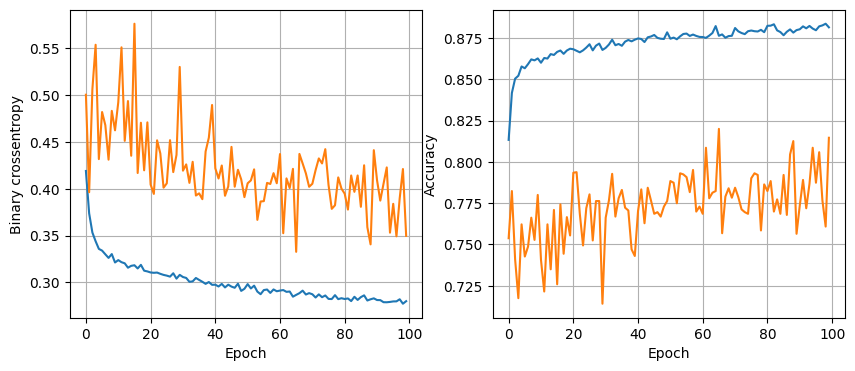

119/119 [==============================] - 0s 2ms/step - loss: 0.3032 - accuracy: 0.8741
64 nodes, dropout 0.2, lr 0.005, batch size 128


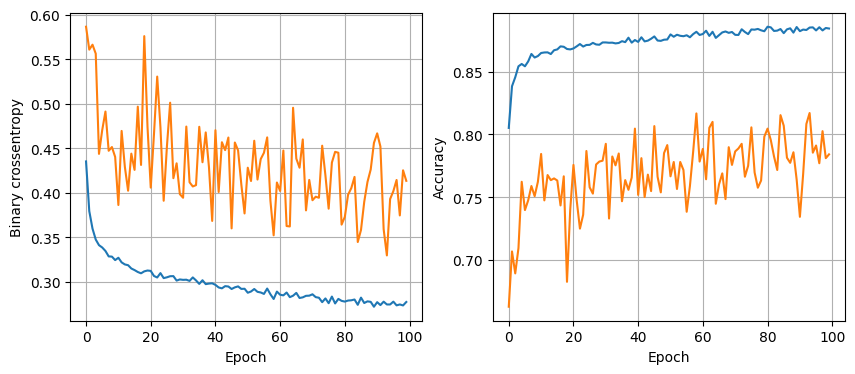

119/119 [==============================] - 0s 2ms/step - loss: 0.3101 - accuracy: 0.8746
64 nodes, dropout 0.2, lr 0.001, batch size 32


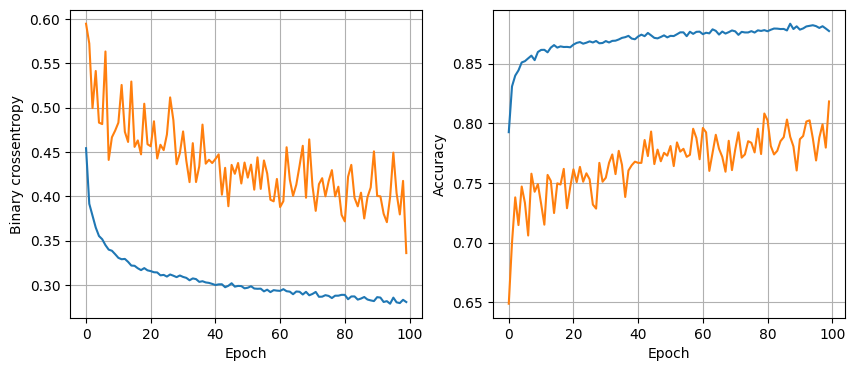

119/119 [==============================] - 0s 2ms/step - loss: 0.3086 - accuracy: 0.8712
64 nodes, dropout 0.2, lr 0.001, batch size 64


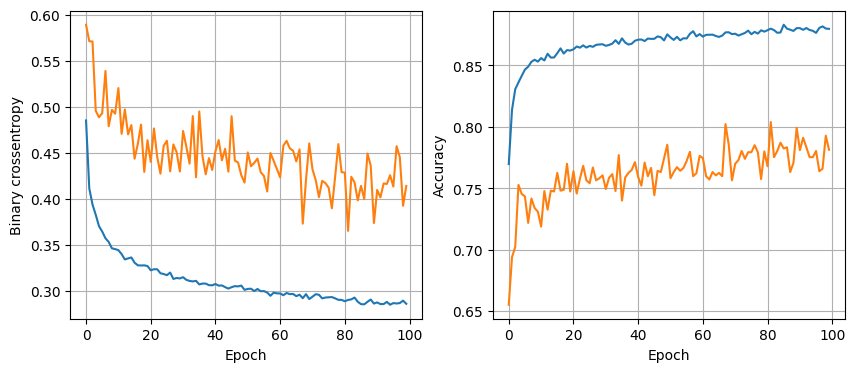

119/119 [==============================] - 0s 2ms/step - loss: 0.3018 - accuracy: 0.8804
64 nodes, dropout 0.2, lr 0.001, batch size 128


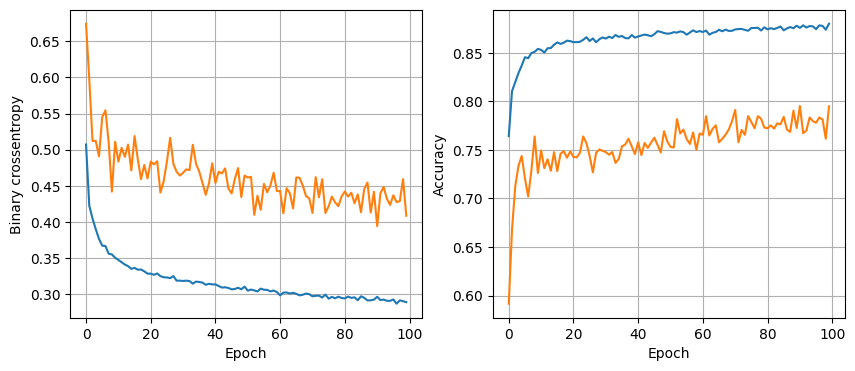

119/119 [==============================] - 0s 2ms/step - loss: 0.3027 - accuracy: 0.8717


In [224]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [225]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 1ms/step


In [226]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82      1372
           1       0.88      0.95      0.91      2432

    accuracy                           0.88      3804
   macro avg       0.88      0.86      0.87      3804
weighted avg       0.88      0.88      0.88      3804

